<a href="https://github.com/angelomarcelino/machine_learning/blob/main/lista_2/q5_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 5

Utilize uma rede autoencoder, aplicada ao problema da redução de dimensionalidade (compressão/descompressão). Para isto considere a matriz de dados abaixo:

$\mathbf{F} = \begin{bmatrix} 0.9192 & 0.4677 & 0.1714 & 0.0703 & 0.1052 \\ 
0.7719 & 0.9291 & 0.3725 & 0.1238 & 0.0416 \\
0.0654 & 0.4459 & 0.9397 & 0.3263 & 0.3686 \\
0.4428 & 0.1433 & 0.1649 & 0.9601 & 0.4239 \\
0.07772 & 0.2053 & 0.2550 & 0.5177 & 0.9272 \end{bmatrix}$
    
Obtenha uma compressão 5:3, isto é, comprima a matriz 5x5 para uma matriz 3x3. Obtenha a matriz descomprimida isto é $\hat{\mathbf{F}}$ e calcule a relação sinal ruído em dB, definida como:

$$\dfrac{S}{N} = 10\text{log}_{10} \begin{bmatrix}\dfrac{\sum\limits^{N}_{m=1}\sum\limits^{N}_{n=1} f^2(m,n)}{\sum\limits^{N}_{m=1}\sum\limits^{N}_{n=1} \mid f(m,n) - \hat{f}^2(m,n)\mid}\end{bmatrix}$$

In [9]:
import numpy as np

data = np.array([
     [0.9192, 0.4677, 0.1714, 0.0703, 0.1052],
     [0.7719, 0.9291, 0.3725, 0.1238, 0.0416],
     [0.0654, 0.4459, 0.9397, 0.3263, 0.3686],
     [0.4428, 0.1433, 0.1649, 0.9601, 0.4239],
     [0.07772, 0.2053, 0.2550, 0.5177, 0.9272]
])


train_data = data.reshape((1, 25))


In [10]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

input = Input(shape=(25, ))
encoded = Dense(9, activation='relu')(input)
decoded = Dense(25, activation='tanh')(encoded)

autoencoder = Model(input, decoded)

autoencoder.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

autoencoder.summary()


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 234       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                250       
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

history = autoencoder.fit(
    train_data, train_data,
    epochs=1000,
    callbacks=[EarlyStopping(monitor='loss', patience=5)],
    verbose=0
)

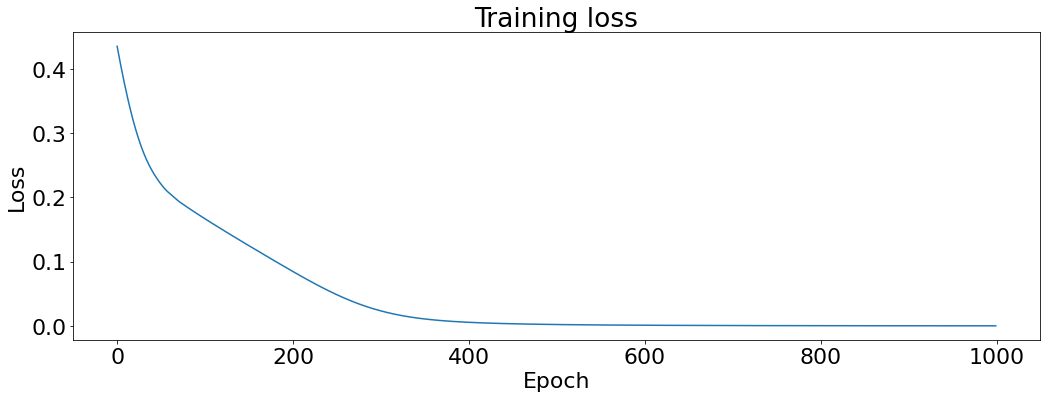

In [12]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

fig, axes = plt.subplots(figsize=(15, 6))

axes.plot(history.history['loss'])

axes.set(
    title='Training loss',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.tight_layout()
plt.show()

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

encoder = Model(input, encoded)

encoded_data = encoder.predict(data.reshape((1, 25)))

encoded_input = Input(shape=(9,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

decoded_data = decoder.predict(encoded_data)

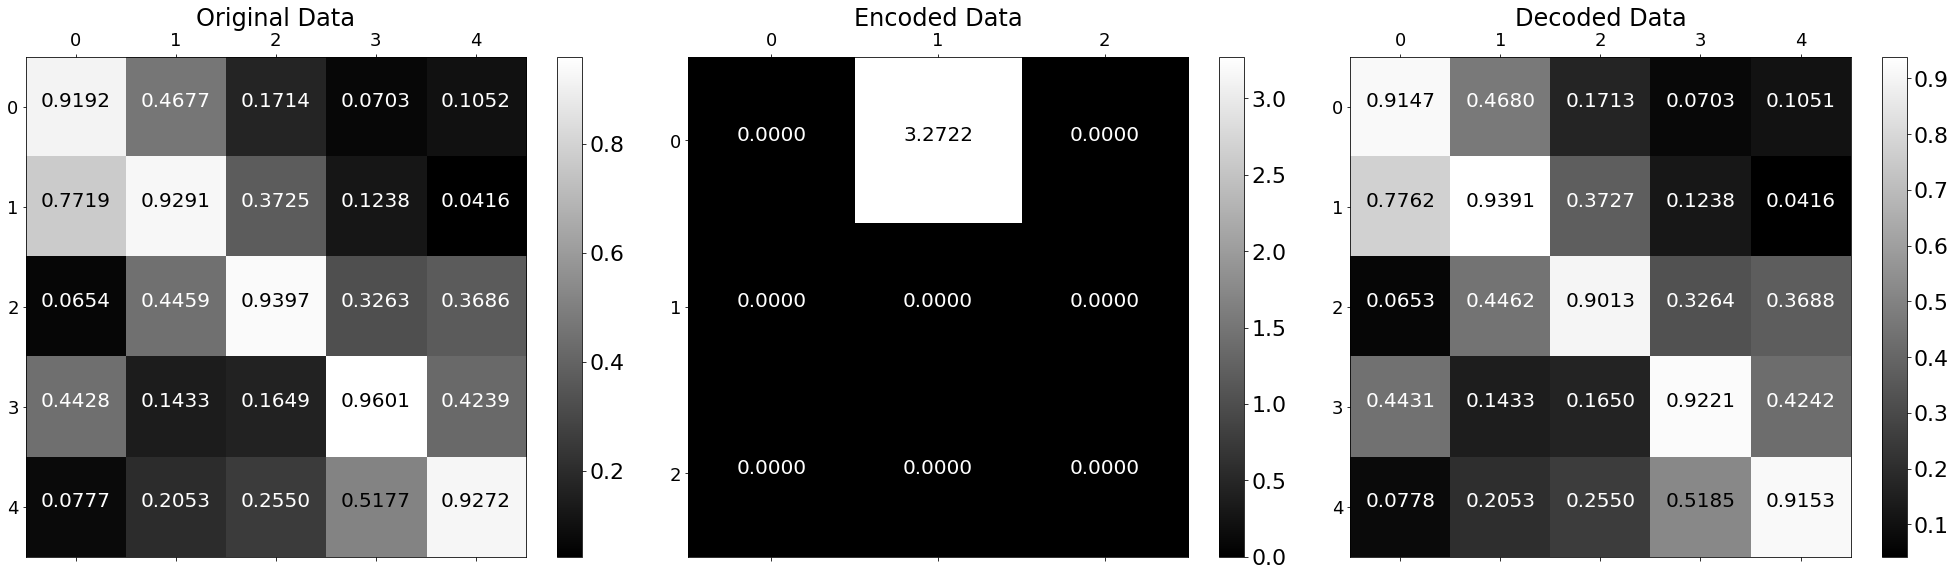

In [14]:
import itertools

def plot_matrix(matrix, title, ax):  

    cax = ax.matshow(matrix, cmap='gray')

    thresh = matrix.max() / 2
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):   
            ax.text(
                j, i, f'{matrix[i, j]:.4f}',
                horizontalalignment='center',
                fontsize=20,
                color='black' if matrix[i, j] > thresh else 'white'
            )
    
    fig.colorbar(cax, ax=ax)
    ax.set_title(title, fontsize=24)
    ax.tick_params(labelsize=18)

fig, axes = plt.subplots(ncols=3, figsize=(28, 8))
axes = axes.flatten()

matrizes = [
    ('Original Data', data),
    ('Encoded Data', encoded_data[0].reshape(3, 3)),
    ('Decoded Data', decoded_data[0].reshape(5, 5))
]

for ax, (title, matrix) in zip(axes, matrizes):
    plot_matrix(matrix, title, ax)

plt.tight_layout()
plt.show()



In [16]:
signal_noise_ratio = 10 * np.log10( np.sum(data**2) / np.sum( np.abs(data - decoded_data[0].reshape(5, 5))**2 ))
z'
print(f'Relação sinal ruído: {signal_noise_ratio:.3f} dB')

Relação sinal ruído: 33.172 dB
